#### Problem 8

/var/folders/2z/kvvrz9fx7575sz8vyx1php7c0000gn/T/ipykernel_58962/2686341211.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(delta_S)


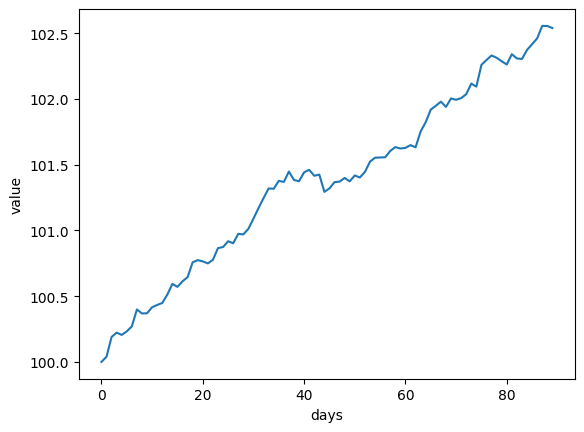

In [2]:
# 计算delta_T
import math
import numpy as np
import matplotlib.pyplot as plt

mu = 0.1/365
sigma = math.sqrt(0.3**2/365)
S0 = 100
T = 90
# get delta S
def get_delta_S(S, mu, delta_t, sigma):
    from scipy.stats import norm
    from math import sqrt
    epsilon = norm(0, 1).rvs(size=1)
    delta_W = sqrt(delta_t) * epsilon
    delta_S = S * (mu * delta_t + sigma * delta_W)
    return float(delta_S)

def get_S_seq(S0, T, mu, delta_t, sigma):
    seq = [S0]
    for _ in range(T):
        S = seq[-1]
        St = S+ get_delta_S(S, mu, delta_t, sigma)
        seq.append(St)
    return seq



# 股票价格分布

n = 1000
sq = [get_S_seq(S0=100, T=90, mu=mu, delta_t=1, sigma=sigma) for _ in range(n)]
mean_sq = [sum([s[i] for s in sq])/n for i in range(90)]
plt.plot(np.arange(90), mean_sq)
plt.xlabel("days")
plt.ylabel("value")
plt.show()


$\forall S_T>=100,\max\{X-S_T,0\}=X-S_T$

#### Problem 9

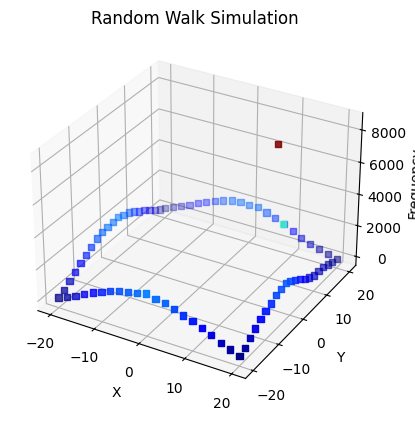

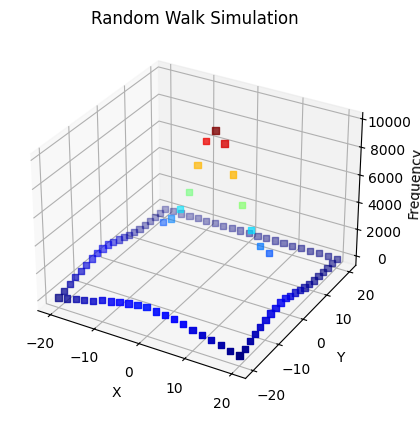

In [3]:
import random
class point():
    def __init__(self) -> None:
        self.crush = False
        self.x = 0
        self.y = 0
    # 随机游走
    def run(self):
        if not self.crush:
            dx = random.choice([-1,1])
            dy = random.choice([-1,1])
            self.x += dx
            self.y += dy
            return 1
        else:
            return -1
    
    # 停止检测
    def isCrushed(self):
        if (self.x == 13 or self.x == 14) and (self.y == 7 or self.y == 8):
            self.crush = True
        elif (self.x == 20 or self.x == -20) or (self.y == 20 or self.y == -20):
            self.crush = True
        else:
            pass
        
    def get_coordinates(self):
        return (self.x, self.y)
    
# 第二小题point继承
class point2(point):
    def isCrushed(self):
        if (-12 <= self.x <= 12) and (self.y == 6):
            self.crush = True
        elif (self.x == 20 or self.x == -20) or (self.y == 20 or self.y == -20):
            self.crush = True
        else:
            pass
        
# 第九题
def P9(class_point,n):
    nPoints = []
    for i in range(n):
        p = class_point()
        while not p.crush:
            p.run()
            p.isCrushed()
        cor = p.get_coordinates()
        nPoints.append(cor)

    cor_count = {}
    for cor in nPoints:
        if cor in cor_count:
            cor_count[cor] += 1
        else:
            cor_count[cor] = 1
    # 获取坐标作图
    x = [coord[0] for coord in cor_count.keys()]  
    y = [coord[1] for coord in cor_count.keys()]  
    z = list(cor_count.values())  
    
    fig = plt.figure()  
    ax = fig.add_subplot(111, projection='3d')  
    ax.scatter(x, y, z, c=z, cmap='jet', marker='s')  
    ax.set_xlabel('X')  
    ax.set_ylabel('Y')  
    ax.set_zlabel('Frequency')  
    ax.set_title('Random Walk Simulation')  
    plt.show()  

P9(point,100000)
P9(point2,100000)

#### Problem10


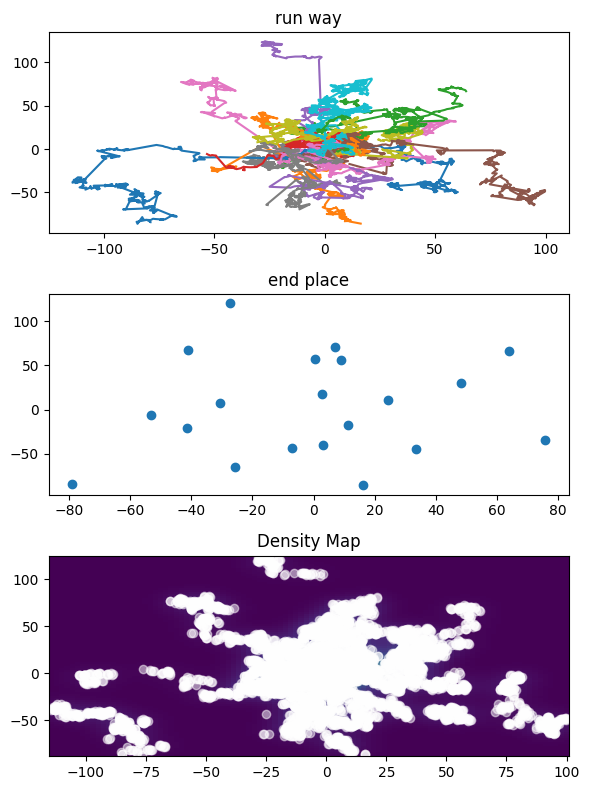

In [4]:
from scipy.stats import uniform
from random import choice
from math import pi, sqrt

def f(x):
    return 2/(math.pi * (1 + x**2))

# 得到一个点的坐标序列
def get_run_way(n):
    def inverse_f(x):
        return sqrt(2/(pi * x) - 1)
    x, y = 0, 0
    run_way = [(x,y)]
    rho = [choice([-1,1]) * inverse_f(uniform(0, 2/pi).rvs()) for _ in range(n)]
    angle = list(uniform(0, 2*pi).rvs(n))
    for i in range(n):
        dx, dy = rho[i] * np.cos(angle[i]), rho[i] * np.sin(angle[i])
        x += dx
        y += dy
        run_way.append((x,y))
    return run_way

def plot_run_way(points, n):
    fig, axs = plt.subplots(3,1, figsize = (6,8))
    all = []
    endx, endy = [], []
    for _ in range(points):
        run = get_run_way(n)
        all += run
        axs[0].plot([run[i][0] for i in range(n)], [run[i][1] for i in range(n)])
        endx.append(run[n-1][0])
        endy.append(run[n-1][1])
    axs[0].set_title("run way")
    axs[1].scatter(endx, endy)
    axs[1].set_title("end place")
    from scipy.stats import gaussian_kde  
    x = [p[0] for p in all]  
    y = [p[1] for p in all]  
# 使用核密度估计方法计算概率密度函数  
    kde = gaussian_kde(np.vstack([x, y]))  
    # 生成网格点  
    xmin, xmax = min(x), max(x)  
    ymin, ymax = min(y), max(y)  
    xi, yi = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]  
    zi = kde(np.vstack([xi.flatten(), yi.flatten()]))  
    # 绘制密度分布图  
    axs[2].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')  
    axs[2].scatter(x, y, color='white', alpha=0.5)  
    axs[2].set_title('Density Map')          
    plt.tight_layout()
    plt.show()
    return

plot_run_way(20,400)


路径集中在原点附近，停止点大多数在 $[-50,50]\times [-50,50] $中

#### 雅可比迭代法，monte-carlo方法

In [9]:
# Jacobi实现
def Jacobi(A, b, k=1000):
    X0 = np.array([[1] for _ in range(len(A))])
    A = np.array(A)
    inv_D = np.linalg.inv(np.diag(np.diag(A)))
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    X = X0
    for _ in range(k):
        Xt = np.dot(inv_D, np.subtract(b, np.dot((L + U), X)))
        X = Xt
    return X

A = [[4, 1, 2], [2, 4, 1], [1, 4, 8]]
b = [[12], [13], [33]]
# 准确解 【1，2，3】
print(Jacobi(A, b, k=100))

# 10阶
A_10 = np.array([[40, 1, 2, 5, 6, 7, 8, 9, 3, 2],
                 [2, 40, 1, 5, 6, 7, 8, 9, 3, 2],
                 [1, 4, 80, 5, 6, 7, 8, 9, 3, 2],
                 [2, 4, 1, 50, 6, 7, 8, 9, 3, 2],
                 [1, 4, 8, 5, 60, 7, 8, 9, 3, 2],
                 [2, 4, 1, 5, 6, 70, 8, 9, 3, 2],
                 [1, 4, 8, 5, 6, 7, 80, 9, 3, 2],
                 [2, 4, 1, 5, 6, 7, 8, 90, 3, 2],
                 [1, 4, 8, 5, 6, 7, 8, 9, 30, 2],
                 [2, 4, 1, 5, 6, 7, 8, 9, 3, 40]])

b_10 = np.array([[12], [13], [33], [12], [13], [33], [12], [13], [33], [12]])
print(Jacobi(A_10,b_10))

# 100阶
A_100 = np.random.rand(100,100)
for i in range(100):
    row_sum = np.sum(np.abs(A_100[i])) - np.abs(A_100[i, i])  # 计算除对角线元素外其他元素的绝对值之和
    while np.abs(A_100[i, i]) < row_sum:  # 若对角线元素小于其他元素绝对值之和，则重新生成对角线元素
        A_100[i, i] += row_sum

b_100 = np.random.rand(100,1)
print(Jacobi(A_100,b_100))
# monte-carlo实现 不会



[[1.]
 [2.]
 [3.]]
[[0.10562219]
 [0.13667765]
 [0.31678503]
 [0.0871199 ]
 [0.05200967]
 [0.39556183]
 [0.02511837]
 [0.06074562]
 [0.84476008]
 [0.1031683 ]]
[[ 0.00476746]
 [ 0.00577446]
 [ 0.00296096]
 [ 0.00607192]
 [ 0.00769491]
 [-0.00243937]
 [ 0.00182491]
 [ 0.01031376]
 [ 0.01409333]
 [ 0.01344981]
 [ 0.01353268]
 [ 0.008232  ]
 [ 0.00881088]
 [ 0.00125349]
 [ 0.00591434]
 [ 0.00816696]
 [ 0.00679177]
 [ 0.00690011]
 [ 0.00321622]
 [ 0.0094525 ]
 [ 0.0095893 ]
 [ 0.01226668]
 [ 0.01158126]
 [ 0.0088738 ]
 [ 0.00490679]
 [ 0.00964925]
 [ 0.00891868]
 [ 0.00996563]
 [ 0.00365717]
 [ 0.0053837 ]
 [-0.00456797]
 [ 0.00710528]
 [-0.00235139]
 [ 0.00955435]
 [ 0.01339565]
 [ 0.01341364]
 [-0.00169333]
 [ 0.00502234]
 [-0.00050393]
 [ 0.01060269]
 [-0.00367444]
 [-0.00101403]
 [ 0.00954395]
 [ 0.00272469]
 [ 0.00834772]
 [-0.00067524]
 [ 0.00287686]
 [ 0.00623484]
 [ 0.00396034]
 [ 0.00028257]
 [ 0.00703639]
 [-0.00419986]
 [ 0.01061427]
 [ 0.0099909 ]
 [ 0.01624554]
 [ 0.00512861]


雅可比方法只有矩阵主对角占优的时候计算效率才高，其他情况要么不收敛要么计算很慢